In [1]:
# Import dependencies.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('../resources/cleaned_mode.csv')
df.info()

# Model Implementation

In [31]:
model_df = pd.get_dummies(df)
model_df.head()

,city_development_index,relevent_experience,training_hours,target,city_Other,city_city_100,city_city_102,city_city_103,city_city_104,city_city_11,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.920,1,36,1.0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0.776,0,47,0.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.624,0,83,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.789,0,52,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.767,1,8,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
# Split the data into a training set and a testing set.
y = model_df.target
X = model_df.drop(columns='target')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Instantiate a StandardScaler instance.
scaler = StandardScaler()

# Fit the training data to the standard scaler.
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler.
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler.
X_test_scaled = X_scaler.transform(X_test)

In [33]:
# Due to imbalanced target values, instantiate the random oversampler model.
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)

In [34]:
# Implement a logistic regression model.
classifier = LogisticRegression(solver='lbfgs', random_state=42)
classifier.fit(X_res, y_res)
predictions = classifier.predict(X_test_scaled)

In [35]:
# Display the accuracy score for the test dataset.
print(f'Accuracy score: {accuracy_score(y_test, predictions):.2f}')

Accuracy score: 0.74


In [36]:
# Display the confusion matrix.
confusion_matrix(y_test, predictions)

array([[2678,  918],
       [ 313,  881]], dtype=int64)

| n=19158 | Predicted: Staying | Predicted: Leaving |
| --- | --- | --- |
| Actual: Staying | 2678 | 918 |
| Actual: Leaving | 313 | 881 |


In [37]:
# Display the classification report.
target_names = ['stay', 'leave']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

        stay       0.90      0.74      0.81      3596
       leave       0.49      0.74      0.59      1194

    accuracy                           0.74      4790
   macro avg       0.69      0.74      0.70      4790
weighted avg       0.79      0.74      0.76      4790



Considering that a recall score of 0.74 is achieved for predicting individuals leaving their current employment, this is a good starting point for our analysis.

# Feature Importance

In [39]:
importance = classifier.coef_[0]
for i,v in enumerate(importance):
    if abs(v)>=0.1:
        print(f'Feature: {X.columns[i]}, Score: {v:.3f}')

Feature: city_development_index, Score: -0.651
Feature: relevent_experience, Score: -0.232
Feature: city_Other, Score: -0.158
Feature: city_city_103, Score: 0.154
Feature: city_city_114, Score: -0.105
Feature: city_city_136, Score: -0.109
Feature: city_city_21, Score: 0.229
Feature: education_level_Graduate, Score: 0.117
Feature: education_level_High School, Score: -0.178
Feature: education_level_Primary School, Score: -0.119
Feature: company_size_100-500, Score: -0.125
Feature: company_size_50-99, Score: 0.270
Feature: company_type_Funded Startup, Score: -0.136
Feature: last_new_job_never, Score: -0.133


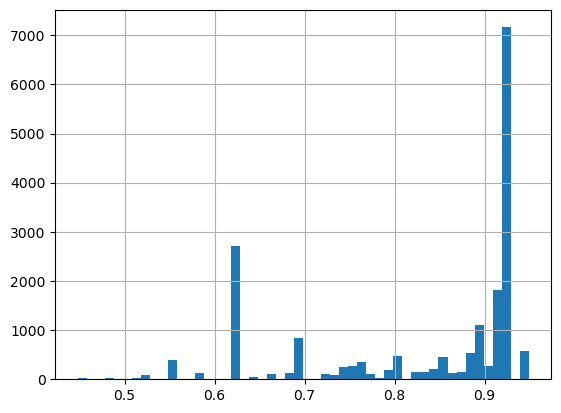

In [46]:
df['city_development_index'].hist(bins=50);

In [47]:
df['city_development_index'].describe()

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64